In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("data.csv") # ROTATION IN RADS
df["Rotation"] = np.degrees(df["Rotation"])
trial_schedule = pd.read_csv("tgt.csv")

df.head()

,Trial,Mouse X,Mouse Y,Cursor X,Cursor Y,Rotation
0,0,-1.0,-5.0,-1.173888,-4.962055,-2.0
1,0,-1.0,-5.0,-1.173888,-4.962055,-2.0
2,0,-1.0,-5.0,-1.173888,-4.962055,-2.0
3,0,-1.0,-5.0,-1.173888,-4.962055,-2.0
4,0,-1.0,-5.0,-1.173888,-4.962055,-2.0


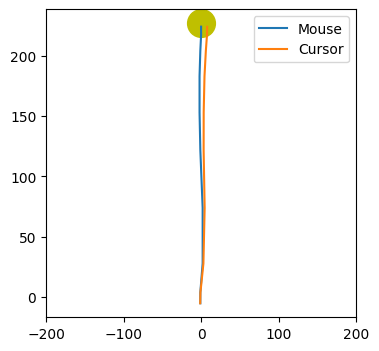

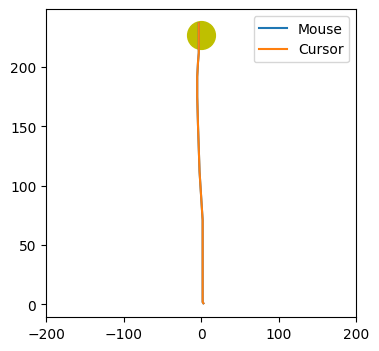

In [3]:
target_loc_x, target_loc_y = (0, 3.78*60)

trial_min = 0
trial_max = 1
df_head = df[df["Trial"].between(trial_min, trial_max)]


for trial, trial_data in df_head.groupby("Trial"):
    plt.figure(figsize=(4, 4))
    plt.plot(trial_data["Mouse X"], trial_data["Mouse Y"], label=f"Mouse")
    plt.plot(trial_data["Cursor X"], trial_data["Cursor Y"], label=f"Cursor")
    plt.scatter(target_loc_x, target_loc_y, s=400, color='y')

    plt.xlim([-200, 200])
    plt.legend()
    plt.show()

In [4]:
# Compute start and end positions for each trial
df_grouped = df.groupby("Trial")[["Cursor X", "Cursor Y"]].agg(["first", "last"])
df_grouped["Rotation"] = df.groupby("Trial")["Rotation"].agg("first")

df_grouped["Delta X"] = df_grouped[("Cursor X", "last")] - df_grouped[("Cursor X", "first")]
df_grouped["Delta Y"] = df_grouped[("Cursor Y", "last")] - df_grouped[("Cursor Y", "first")]

df_grouped["Cursor Angle"] = np.degrees(-np.arctan2(df_grouped["Delta X"], df_grouped["Delta Y"]))  # atan2(x, y)


df_grouped.head()

Cursor X            Cursor Y             Rotation   Delta X  \
          first      last     first        last                      
Trial                                                                
0     -1.173888  7.817487 -4.962055  223.863545     -2.0  8.991376   
1      3.000000 -3.000000  1.000000  237.000000      0.0 -6.000000   
2     -5.000000 -6.000000  2.000000  230.000000      0.0 -1.000000   
3     -1.000000 -1.000000 -6.000000  229.000000      0.0  0.000000   
4      0.034899 -3.889723 -0.999391  226.001925      2.0 -3.924622   

          Delta Y Cursor Angle  
                                
Trial                           
0      228.825600    -2.250198  
1      236.000000     1.456359  
2      228.000000     0.251296  
3      235.000000    -0.000000  
4      227.001316     0.990487

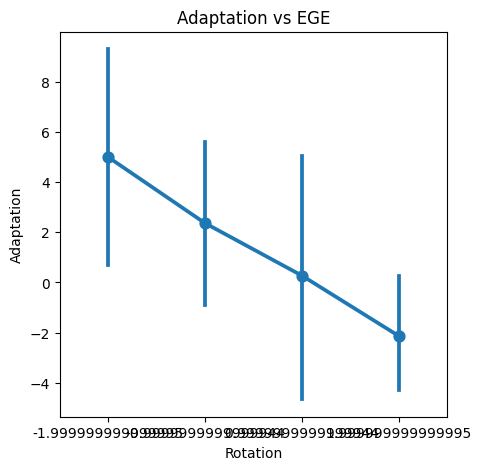

In [9]:
pert_idx = (df_grouped["Rotation"] != 0).to_numpy().nonzero()[0]
valid_idx = pert_idx[(pert_idx > 0) & (pert_idx < len(df_grouped) - 1)]
adapt_index = df_grouped["Cursor Angle"].iloc[valid_idx + 1].reset_index(drop=True) - df_grouped["Cursor Angle"].iloc[valid_idx - 1].reset_index(drop=True)

# adapt_index
adapt_index = pd.DataFrame({
    "Adaptation": adapt_index,
    "Rotation": df_grouped["Rotation"].iloc[valid_idx].reset_index(drop=True)
    })


plt.figure(figsize=(5,5))
sns.pointplot(
    data=adapt_index,
    x="Rotation",
    y="Adaptation",
    errorbar=('ci', 95)
)

plt.title("Adaptation vs EGE")
plt.show()